<a href="https://colab.research.google.com/github/Dashnyam7/DIC/blob/main/What_is_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is linear regression

Linear regression is the approximate fitting of the objective variable ( $y$ ) and the explanatory variable ($x$) with the relational expression $y=ax+b$

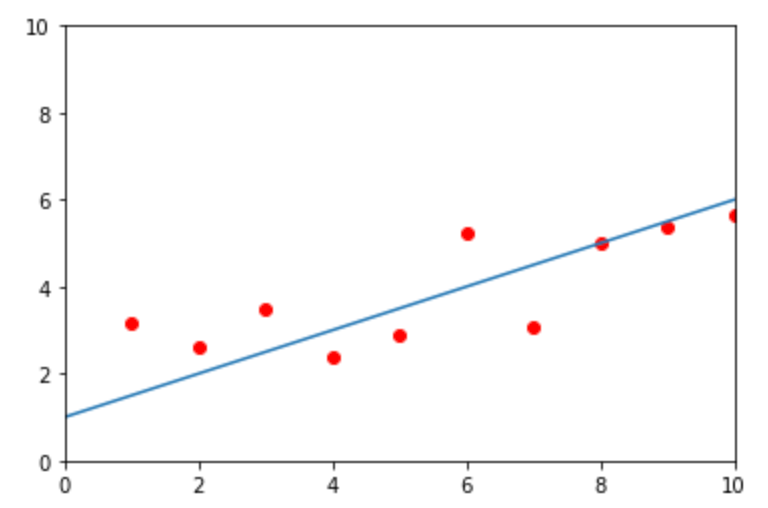

Finding $a, b$ that best fit the data is called solving linear regression . Various methods-> steepest descent method . The steepest descent method is a basic method that can be widely used even for problems that are difficult to solve analytically, and it is closely related to neural networks

### Scratch code overview

In [21]:
class ScratchLinearRegression():
    def __init__(self, num_iter, lr, bias, verbose): 
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    # Problem 6 (learning and estimation)
    def fit(self):
        """
        Learning Linear Regression
        """
        pass


    # Question 1
    def _linear_hypothesis(self):
        """
        Assumption function
        """
        pass

    # Question 2
    def _gradient_descent(self):
        """
        Parameter update value calculation by steepest descent method
        """
        pass

    # Question 3
    def predict(self):
        """
        Estimation in Linear Regression
        """
        pass

    # Question 4
    def _mse(self):
        """
        Calculate Mean Squared Error
        """
        pass

    # Question 5
    def _loss_func(self):
        """
        loss function
        """
        pass

Line 1: Class definition

Line 2: Constructor definition. As arguments, num_iter (the number of times of learning), lr (learning rate), bias (whether to include a constant term), verbose (whether to output the learning process)

Line 3 ~: Definition of necessary member variables. Variables (theta) used across various functions, variables (num_iter, lr, bias, verbose) to be passed as arguments during instantiation, and variables (loss, val_loss) to be referenced via instances are defined as member variables. To do.

# What is assumption function in linear regression

In many cases, the objective variable and the explanatory variable are simple relational expressions that do not necessarily match exactly.

Here, humans provisionally define a function (formula) that the data is likely to follow. This is called an assumption function .

In addition, it is rare that the relationship between variables is clear at the time the data are given, and in general, it is necessary to consider what variables affect the subject of analysis and how it is affected. I have.
This process is called modeling

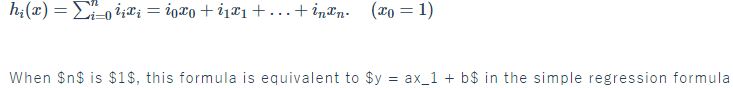

Using real vectors $\theta$(theta) and $x$ of length $n+1$, the above equation can be written as the following equation including vector inner product.
A . (period) at the end of a formula ends the formula. Ignore it as it has no effect on the formula. The description can be omitted.
(2)
h
i
(
x
)
=
i
⋅
x
.

### Implementation using inner product

In [22]:
import numpy as np

# y=ax1+b
a = 1
b = 2
x1 = 3
y = a * x1 + b
print(y)

5


Equivalent processing can be performed by setting the part corresponding to $b$ as the first component of $\theta$ and the first component of input $X$ as $1$.

In [23]:
theta = np.array([[b], [a]])
X = np.array([[1, x1]])
y = X@theta
print(y)

[[5]]


That is, where $y = X@theta$ defines the hypothetical function for linear regression

### function implementation

In [24]:
def linear_hypothesis(self, X):
    """
    compute the output of the hypothetical function
    Parameters
    ----------
    X : of the form  ndarray, shape (n_samples, n_features)
      training data
    Returns
    -------
    next shape ndarray, shape (n_samples, 1)
    Estimation result by linear assumption function
    """
    pred = X @ self.theta
    return pred

Line 1: Function definition. Receives the explanatory variable X as an argument. The first argument, self, specifies that this function is a member function.

Lines 2 to 12: docstring (description of the function)

13th line: Calculation of predicted value/calculation of output area of ​​hypothetical function. Theta is then initialized in the fit function and treated as a member variable.

Line 14: return as a return value

# What is gradient descent in linear regression

### margin of error

The best fit to the data generally means that the mean of the sum of squares of the difference between the predicted value and the true value (sum of squares error) is minimized.

The difference between the predicted value and the true value is called the error, and the mean of their sums of squares is called the mean squared error (MSE).

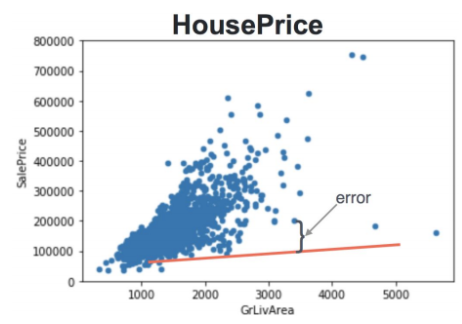

### mean squared error (MSE)

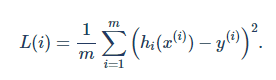

$x^{(i)}$: $x$ value of $i$th data

$y^{(i)}$: $y$ value of $i$th data

$h_\theta(x^{(i)})$: predicted value of $i$th data

The goal of steepest descent is to find $\theta$ such that the value of this expression is minimized.

### Method of steepest descent (how to find $\theta$)

In linear regression, this function draws a parabola when the horizontal axis is $\theta$ and the vertical axis is the mean squared error.
To explain why we draw a parabola, consider substituting the simple regression equation $ax+b$ into $h_\theta(x^{(i)})$.

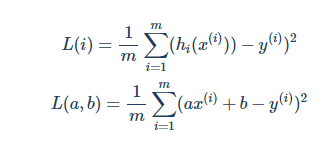

As you can see from this formula, the parameters $a and b$ are convex quadratic functions.
So if we plot the mean squared error formula with $L$ on the vertical axis and $\theta$ on the horizontal axis, we can see that it would look like the figure below. shape is unknown).

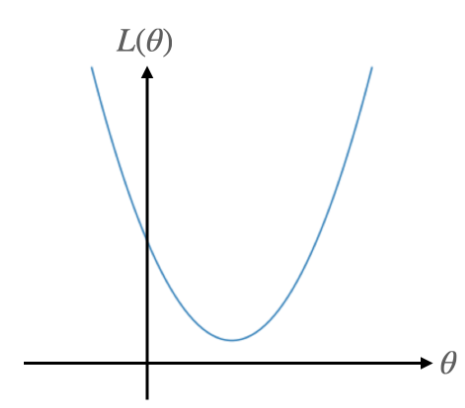

Find the position of this $\theta$ by the following procedure.

1. First, plot randomly based on $\theta$.

2. Calculate MSE.

3. Find the slope of a randomly plotted $\theta$ position.(Ulamjlal avna)

4. Update the value of $\theta$ based on the slope (gradient) and learning rate.

5. Repeat 1 to 4 until the value of $\theta$ converges sufficiently.

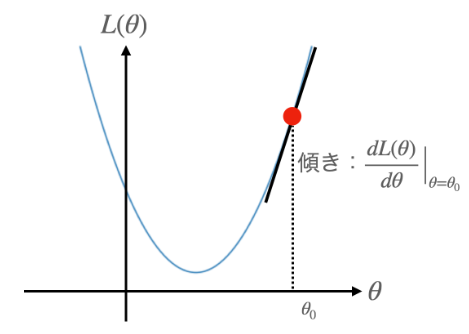
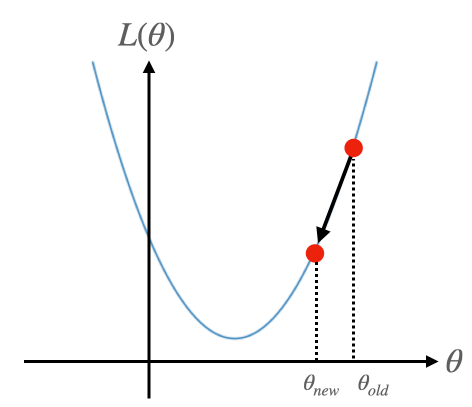

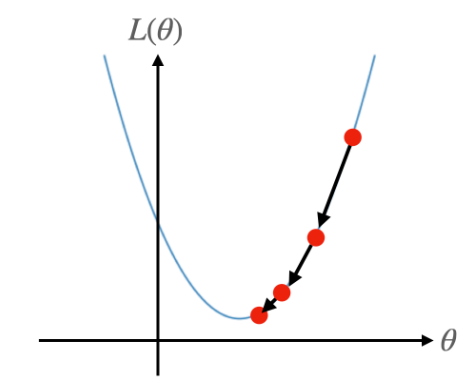



Let's calculate the slope (gradient) formula $\frac{\partial L(\theta)}{\partial \theta}$ .

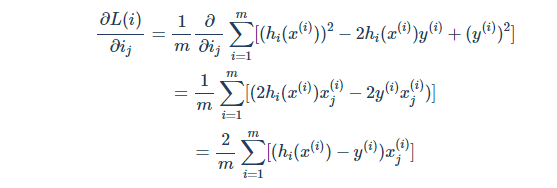

It is calculated like this. Note that the coefficient of $\theta_j$ is $x_{j}^{(i)}$ in linear regression.

So the expression representing the update looks like this:

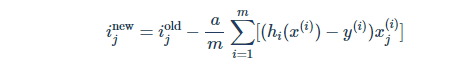

### Create function

If you implement the update formula using python, it will be as follows.
The following is just the function extracted from the completed code, so the function alone will not work.
If you want to run the function below by itself, you need to define it as a Class and adjust the argument self, the 4th line that calls the function in the same Class, self.theta defined in the constructor, etc.

In [25]:
def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self.linear_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * (gradient / m)

Line 1: Function definition. As arguments, it receives explanatory variable X and objective variable y.

Line 2: Stores the number of data in m

Line 3: Stores the number of explanatory variables in n

Line 4: Running linear_hypothesis to calculate predicted values

Line 5: Looping with n number of explanatory variables

Line 6: 0 is substituted for the gradient (calculation result of Σ in the update formula)

Line 7: Looping with number m of data

Line 8: (pred[i] - y[i]) * X[i, j]is the calculation inside Σ of the update formula, and by using it, it is calculated gradient += to be the final value of Σ

Line 9: Since Σ ( gradient) of the update formula has been calculated, it is used self.theta[j]to update the corresponding theta ( )

# What is linear regression estimation

### Create function

In [26]:
def predict(self, X):
    if self.bias == True:
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([bias, X])
    pred_y = self._linear_hypothesis(X)
    return pred_y

Line 1: Function definition. As an argument, it receives the definition of self and the explanatory variable X so that the instance itself can be used.

Line 2: Whether or not to use the bias term

Line 3: Definition of the bias term (constant term). reshapeThe number of explanatory variables is initialized to 1, so that the number of matrices is (number of data, 1)

Line 4: Combines the bias term with the explanatory variable X received as an argument

Line 5: Passing the explanatory variable X to the _linear_hypothesis function, executing it, and calculating the predicted value

Line 6: Returns the calculated predicted value as a return value

# Mean squared error of linear regression

The mean squared error is the average of the squared values ​​of the "difference between the correct value and the predicted value" for each data in the training data . Expressed as a formula, it is as follows.

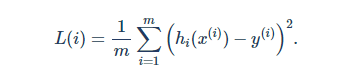

$x^{(i)}$: $x$ value of $i$th data

$y^{(i)}$: $y$ value of $i$th data

$h_\theta(x^{(i)})$: predicted value of $i$th data

### Create function

In [27]:
def MSE(self,y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse

Line 1: Function definition. It receives the predicted value y_pred and the correct value y as arguments

Line 2: calculation of MSE. (y_pred - y) ** 2to calculate the square of the error, and to calculate ((y_pred - y) ** 2).sum()its total value. The average value is calculated by dividing the total value by / X.shape[0].

Line 3: MSE is returned as a return value

# Objective function for linear regression

The objective function can be expressed by the following formula.

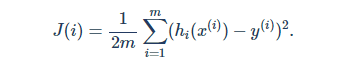

The formula is the mean squared error divided by 2. It is called an objective function in the sense that it is an objective function that should be minimized (large).

The term loss function has an almost similar meaning. The function that determines how to evaluate the residual is called the loss function, and as a result it is the objective function (objective function) that should be minimized (large).

It is also called a cost function, but there is no problem in thinking that it has almost the same meaning.

Here, the mean squared error is expressed by the following formula.

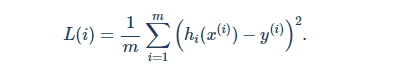

If you compare the formulas, the only difference is whether or not they are divided by 2. Therefore, calculations can be performed using the MSE functions created so far. For the difference between this loss function and the mean squared error, please refer to any text on steepest descent.

### create function

In [28]:
def _loss_func(self,y_pred, y):
    loss = self.MSE(pred, y)/2
    return loss

Line 1: Function definition. It receives the predicted value y_pred and the correct value y as arguments

Line 2: Runs a function that computes the mean squared error and MSEdivides by 2

Line 3: Returning the calculated loss lossas a return value

# Linear regression training and estimation

_linear_hypothesis: Calculating output of hypothetical function

_gradient_descent: Update $\theta$

The purpose of this problem is to use these two functions (which can be modified) ScratchLinearRegressionto implement the above. fit()So let's implement the methods we haven't implemented yet .

Following the flow of the steepest descent algorithm, it is implemented as follows.

1. lr Initialize ( learning rate) and ( num_iternumber of learning times/number of iterations) & initialize $\theta$ . is no problem)__init__()no_biasverbose

2. lr Initialize ( learning rate) and ( num_iternumber of times of learning) & initialize $\theta$ . am)__init__()no_biasverbose

3. Calculate the estimated value _linear_hypothesiswith

4. _gradient_descentUpdate $\theta$
Here, you can draw a learning curve by saving the loss value (solution $J(\theta)$ of problem 5) each time, so don't forget to calculate the loss value and save it as a list. keep it.

5. Repeat 2 and 3 num_iter(number of learning times)

6. guess predict_

### Create function

Now fit()let's write it in the class.

In [29]:
def fit(self, X, y, X_val, y_val): 
    if self.bias == True:
      bias = np.ones((X.shape[0], 1))
      X = np.hstack((bias, X))
      bias = np.ones((X_val.shape[0], 1))
      X_val = np.hstack((bias, X_val))
    self.theta = np.zeros(X.shape[1])
    self.theta = self.theta.reshape(X.shape[1], 1)
    for i in range(self.num_iter):
        pred = self._linear_hypothesis(X)
        pred_val = self._linear_hypothesis(X_val)
        self._gradient_descent(X, y)
        loss = self._loss_func(pred, y)
        self.loss = np.append(self.loss, loss)
        loss_val = self._loss_func(pred_val, y_val)
        self.val_loss = np.append(self.val_loss, loss_val)
        if verbose == True:
            print('The {}th training loss is{}'.format(i,loss))

Line 1: Function definition. As arguments, it receives explanatory variables and objective variables of training data and evaluation data, respectively.

Line 2: Determine whether to use the bias term

Lines 3 and 4: Initialize the bias term and combine it with the explanatory variables of the "training data"

Lines 5 and 6: Initialize the bias term and combine it with the explanatory variables of the "evaluation data"

Line 7: Initializes theta with 1. The number of data in theta matches the number of explanatory variables

Line 8: Reshape to allow matrix operation.（X.shape[1],）→（X.shape[1],1）

Line 9: Loop for the number of learning times

Line 10: Running the what-if function and calculating the predicted value for the "training data"

Line 11: Running the what-if function and calculating the predicted value of the "evaluation data"

Line 12: Running the steepest descent function and updating theta

Line 13: We are "calculating" the loss on the "training data"

Line 14: "calculating" the loss of "evaluation data"

Line 15: "stores" the loss of the "training data"

Line 16: "Storing" the loss of "evaluation data"

Line 17: Determines whether to display the output of the learning process

Line 18: Output learning process

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### execution

Here, num_iter(number of learning times/number of iterations) is set 10, lr(learning rate) is set 0.01, no_bias(bias) is set, and verbose (learning process) is output.

In [34]:
slr = ScratchLinearRegression(num_iter=10, lr=0.01, bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

TypeError: ignored

In [35]:
slr.predict(X_test)

TypeError: ignored

# Learning curve plot

In machine learning, we judge whether learning is successful or not, and make corrections and parameter adjustments.

One way to check the progress of learning is to visualize the value of the loss function (objective function).

A learning curve is a plot of the change in the loss value output by the loss function.

In solving the problem so far, self.losswe store the loss in the scratch class we created. Use this to confirm that the loss value is decreasing.

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(reg.loss)
plt.plot(reg.val_loss)

NameError: ignored